# Prepare datasets

This notebook prepares the datasets according to the data available at:<br>
https://github.com/gfm-collab/chemprop-IR?tab=readme-ov-file

## Libraries

In [1]:
# !pip install -U transformers
# !pip install -U datasets
# !pip install -U huggingface_hub

In [2]:
import os

import ast

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import datasets

import matplotlib.pyplot as plt

## Load data

In [3]:
# computed spectra (local folder)
data_folder = "/storage/smiles2spec/datasets"

data_file = os.path.join(data_folder, "computed_spectra.csv")
suffix = "comp"

# experimental spectra
# data_file = "ir_models_data/solvation_example/solvation_spectra.csv"
# suffix = "exp"

In [4]:
data_df = pd.read_csv(data_file)

In [5]:
data_df

,smiles,400,402,404,406,408,410,412,414,416,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,CN(c1ccc(NC(=O)Nc2ccccc2)cc1)S(=O)(=O)c1ccc(-c...,0.000771,0.000772,0.000774,0.000785,0.000792,0.000797,0.000800,0.000809,0.000812,...,0.000774,0.000786,0.000803,0.000780,0.000782,0.000776,0.000770,0.000765,0.000764,0.000767
1,CC(O)CC(C)C#COC#CC(C)CC(C)O,0.001267,0.001275,0.001275,0.001290,0.001292,0.001303,0.001306,0.001320,0.001335,...,0.001032,0.001046,0.001065,0.001040,0.001047,0.001011,0.001003,0.001020,0.001040,0.000981
2,Cc1cc([N+](=O)[O-])ccc1NC(=O)c1ccc(OCC(C)C)c(B...,0.000540,0.000540,0.000540,0.000541,0.000545,0.000547,0.000545,0.000545,0.000548,...,0.000462,0.000465,0.000453,0.000481,0.000469,0.000452,0.000458,0.000458,0.000465,0.000448
3,COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12,0.001041,0.001044,0.001044,0.001053,0.001056,0.001063,0.001061,0.001069,0.001074,...,0.001045,0.001055,0.001057,0.001063,0.001051,0.001031,0.001030,0.001023,0.001026,0.001022
4,CC(C)(O)C(NC(=O)c1cnn2cc(C3CC3)cnc12)c1ccc(OC(...,0.000721,0.000727,0.000726,0.000733,0.000737,0.000743,0.000745,0.000748,0.000760,...,0.000649,0.000653,0.000655,0.000656,0.000650,0.000636,0.000633,0.000632,0.000635,0.000628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85501,N#Cc1c(Br)[nH]c2c(O)cccc12,0.001536,0.001529,0.001526,0.001542,0.001543,0.001550,0.001555,0.001582,0.001577,...,0.000386,0.000379,0.000344,0.000405,0.000378,0.000348,0.000360,0.000366,0.000375,0.000352
85502,CC(=O)c1cnc2sc(C(=O)Nc3cc(NC(=O)c4cccc(C(C)(C)...,0.001173,0.001170,0.001179,0.001178,0.001185,0.001190,0.001186,0.001191,0.001203,...,0.000725,0.000735,0.000743,0.000736,0.000736,0.000719,0.000718,0.000723,0.000732,0.000705
85503,Cc1ccc(C=NNc2cc(C(F)(F)F)ccc2Cl)cc1,0.000756,0.000757,0.000751,0.000758,0.000764,0.000762,0.000760,0.000759,0.000758,...,0.000368,0.000365,0.000349,0.000381,0.000366,0.000352,0.000358,0.000356,0.000358,0.000354
85504,CN(C)Cc1c(C(=O)NC2N=C(c3ccccc3F)c3cccc4c3N(CC4...,0.001383,0.001370,0.001379,0.001362,0.001364,0.001355,0.001344,0.001336,0.001336,...,0.000793,0.000801,0.000797,0.000811,0.000799,0.000788,0.000790,0.000780,0.000778,0.000785


In [6]:
if suffix == "exp":
    
    data_df = data_df.rename(columns= {"Unnamed: 0" : "smiles"})
    
    # concatenate phase data
    data_comp_file = "ir_models_data/solvation_example/solvation_phases.csv"
    data_comp_df = pd.read_csv(data_comp_file)
    data_df = pd.concat([data_df, data_comp_df], axis=1)
    
    # reorder columns
    cols = data_df.columns.tolist()
    data_df = data_df[cols[-2:] + cols[:-2]]

In [7]:
data_df.head()

,smiles,400,402,404,406,408,410,412,414,416,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
0,CN(c1ccc(NC(=O)Nc2ccccc2)cc1)S(=O)(=O)c1ccc(-c...,0.000771,0.000772,0.000774,0.000785,0.000792,0.000797,0.000800,0.000809,0.000812,...,0.000774,0.000786,0.000803,0.000780,0.000782,0.000776,0.000770,0.000765,0.000764,0.000767
1,CC(O)CC(C)C#COC#CC(C)CC(C)O,0.001267,0.001275,0.001275,0.001290,0.001292,0.001303,0.001306,0.001320,0.001335,...,0.001032,0.001046,0.001065,0.001040,0.001047,0.001011,0.001003,0.001020,0.001040,0.000981
2,Cc1cc([N+](=O)[O-])ccc1NC(=O)c1ccc(OCC(C)C)c(B...,0.000540,0.000540,0.000540,0.000541,0.000545,0.000547,0.000545,0.000545,0.000548,...,0.000462,0.000465,0.000453,0.000481,0.000469,0.000452,0.000458,0.000458,0.000465,0.000448
3,COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12,0.001041,0.001044,0.001044,0.001053,0.001056,0.001063,0.001061,0.001069,0.001074,...,0.001045,0.001055,0.001057,0.001063,0.001051,0.001031,0.001030,0.001023,0.001026,0.001022
4,CC(C)(O)C(NC(=O)c1cnn2cc(C3CC3)cnc12)c1ccc(OC(...,0.000721,0.000727,0.000726,0.000733,0.000737,0.000743,0.000745,0.000748,0.000760,...,0.000649,0.000653,0.000655,0.000656,0.000650,0.000636,0.000633,0.000632,0.000635,0.000628


In [8]:
nb_duplicates = data_df.duplicated(subset=['smiles']).sum()

print(f"There are {nb_duplicates} duplicated SMILES...")

There are 0 duplicated SMILES...


In [10]:
# example of a duplicated smiles check

data_df[data_df.smiles == "CC(O)CC(C)C#COC#CC(C)CC(C)O"]

,smiles,400,402,404,406,408,410,412,414,416,...,3982,3984,3986,3988,3990,3992,3994,3996,3998,4000
1,CC(O)CC(C)C#COC#CC(C)CC(C)O,0.001267,0.001275,0.001275,0.00129,0.001292,0.001303,0.001306,0.00132,0.001335,...,0.001032,0.001046,0.001065,0.00104,0.001047,0.001011,0.001003,0.00102,0.00104,0.000981


## Create datasets

In [11]:
def merge_columns(row, suffix=None):
    
    if suffix == "comp":
        
        return row.values[1:]
    
    if suffix == "exp":
        
        return row.values[3:]

In [12]:
data_df["spectrum"] = data_df.apply(lambda row : merge_columns(row, suffix=suffix), axis=1)
data_df["spectrum"] = data_df["spectrum"].astype('object')

In [13]:
cols = [str(i) for i in range(400, 4001, 2)]

data_df = data_df.drop(cols, axis=1)

In [14]:
data_df.head()

,smiles,spectrum
0,CN(c1ccc(NC(=O)Nc2ccccc2)cc1)S(=O)(=O)c1ccc(-c...,"[0.00077128662946, 0.0007723908046661, 0.00077..."
1,CC(O)CC(C)C#COC#CC(C)CC(C)O,"[0.0012672731579614, 0.0012754371856457, 0.001..."
2,Cc1cc([N+](=O)[O-])ccc1NC(=O)c1ccc(OCC(C)C)c(B...,"[0.0005397718196235, 0.0005399335558759, 0.000..."
3,COC12C(COC(N)=O)C3=C(C(=O)C(C)=C(N)C3=O)N1CC1NC12,"[0.0010406140569326, 0.0010441971359375, 0.001..."
4,CC(C)(O)C(NC(=O)c1cnn2cc(C3CC3)cnc12)c1ccc(OC(...,"[0.0007211904058253, 0.0007266133409325, 0.000..."


In [15]:
len(data_df), len(data_df.iloc[0]["spectrum"])

(85506, 1801)

In [16]:
if suffix == "comp":

    # for computed spectra
    train_df, test_df = train_test_split(data_df, test_size=0.2, random_state=42, shuffle=True)
    test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42, shuffle=True)

elif suffix == "exp":
    
    # for experimental spectra (takes time...)
    data_df_1 = data_df[(data_df["base"] == 1) & (data_df["shift"] == 0)]
    data_df_2 = data_df[(data_df["base"] == 0) & (data_df["shift"] == 1)]

    print(len(data_df_1), len(data_df_2))

    train_df, test_df = train_test_split(data_df_1, test_size=0.2, random_state=42, shuffle=True)
    test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42, shuffle=True)

    print(len(train_df), len(test_df), len(val_df))

    for i, r in data_df_2.iterrows():

        if r["smiles"] in train_df['smiles'].unique():

            train_df = pd.concat([train_df, pd.DataFrame([r])], ignore_index=True)

        elif r["smiles"] in test_df['smiles'].unique():

            test_df = pd.concat([test_df, pd.DataFrame([r])], ignore_index=True)

        elif r["smiles"] in val_df['smiles'].unique():

            val_df = pd.concat([val_df, pd.DataFrame([r])], ignore_index=True)

In [17]:
train_df.shape, test_df.shape, val_df.shape

((68404, 2), (8551, 2), (8551, 2))

In [18]:
# re-shuffle datasets

train_df = train_df.sample(frac = 1, random_state=42)
test_df = test_df.sample(frac = 1, random_state=42)
val_df = val_df.sample(frac = 1, random_state=42)

In [19]:
# sanity checks

print(set(train_df.smiles.value_counts().values))
print(set(test_df.smiles.value_counts().values))
print(set(val_df.smiles.value_counts().values))

train_df.duplicated(subset=['smiles']).sum(), test_df.duplicated(subset=['smiles']).sum(), val_df.duplicated(subset=['smiles']).sum()

{1}
{1}
{1}


(0, 0, 0)

## Check normalization to unitiy in the 500-1500 cm-1 region

"To promote consistent scaling across data sources and phases in model inputs and model predictions, normalization was carried out so that values in the fingerprint region (500−1500 cm−1) sum to unity. The normalization considering the fingerprint region is distinct from the whole-spectrum normalization that is required for loss function calculations as discussed later. Computed spectra were constructed with the same bounds, data spacing, and scaling."

**(McGill et al. 2021, p.2)**

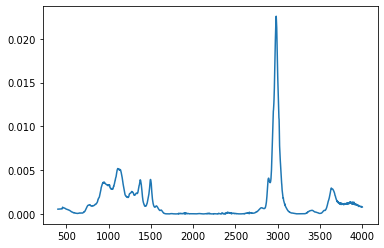

In [30]:
xs = range(400, 4001, 2)

plt.plot(xs, train_df.iloc[456].spectrum)

In [31]:
def extact_region(spectrum , lb=500, ub=1500):
    """
    Extract the region 500−1500 cm−1 of a spectrum
    """
    
    lb_ = list(range(400, 4001, 2)).index(lb)
    ub_ = list(range(400, 4001, 2)).index(ub)
    
    return spectrum[lb_: ub_]

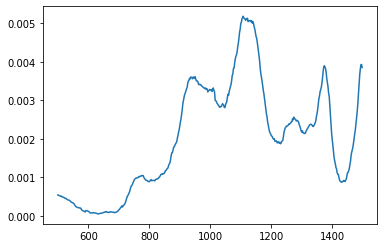

In [32]:
spectrum = train_df.iloc[456].spectrum
region  = extact_region(spectrum , lb=500, ub=1500)

xs = range(500, 1500, 2)

plt.plot(xs, region)

In [33]:
# compute area under curve to check normalization

dx = 1
xx = range(len(region))
yy = region

print('computed AUC using np.trapz: {}'.format(np.trapz(yy, dx=dx)))

computed AUC using np.trapz: 0.9978024396368571


**Spectra are correcltly normalized, no modification needed.**

## Save datasets (csv and hf)

**Format csv**

In [20]:
data_folder = "/storage/smiles2spec_data"

os.listdir(data_folder)

['train_exp.csv',
 'test_comp.csv',
 'test_comp.hf',
 'val_exp.csv',
 'val_comp.csv',
 'val_exp.hf',
 'val_comp.hf',
 'train_exp.hf',
 'test_exp.csv',
 'train_comp.csv',
 'train_comp.hf',
 'test_exp.hf']

In [ ]:
train_df.to_csv(os.path.join(data_folder, f"train_{suffix}.csv"), index=False)
test_df.to_csv(os.path.join(data_folder, f"test_{suffix}.csv"), index=False)
val_df.to_csv(os.path.join(data_folder, f"val_{suffix}.csv"), index=False)

**Format hf (Hugging Face)**

In [21]:
# load data if needed
suffix = "exp"

train_df = pd.read_csv(os.path.join(data_folder, f"train_{suffix}.csv"))
test_df = pd.read_csv(os.path.join(data_folder, f"test_{suffix}.csv"))
val_df = pd.read_csv(os.path.join(data_folder, f"val_{suffix}.csv"))

In [22]:
# Convert to hf datasets
train_hf = datasets.Dataset.from_pandas(train_df, split='train', preserve_index=False)
test_hf = datasets.Dataset.from_pandas(test_df, split='test', preserve_index=False)
val_hf = datasets.Dataset.from_pandas(val_df, split='eval', preserve_index=False)

In [23]:
# Convert spectra to list of floats
def convert_spectrum(sample):

    sample["spectrum"] = ast.literal_eval(sample["spectrum"])

    return sample

In [24]:
train_hf = train_hf.map(convert_spectrum)
test_hf = test_hf.map(convert_spectrum)
val_hf = val_hf.map(convert_spectrum)

  0%|          | 0/48000 [00:00<?, ?ex/s]

  0%|          | 0/6000 [00:00<?, ?ex/s]

  0%|          | 0/6000 [00:00<?, ?ex/s]

In [25]:
train_hf, test_hf, val_hf

(Dataset({
     features: ['base', 'shift', 'smiles', 'spectrum'],
     num_rows: 48000
 }),
 Dataset({
     features: ['base', 'shift', 'smiles', 'spectrum'],
     num_rows: 6000
 }),
 Dataset({
     features: ['base', 'shift', 'smiles', 'spectrum'],
     num_rows: 6000
 }))

In [26]:
type(val_hf[0]["spectrum"])

list

In [27]:
# Save hf datasets
train_hf.save_to_disk(os.path.join(data_folder, f"train_{suffix}.hf"))
test_hf.save_to_disk(os.path.join(data_folder, f"test_{suffix}.hf"))
val_hf.save_to_disk(os.path.join(data_folder, f"val_{suffix}.hf"))

In [28]:
# load dataset
# test_hf = datasets.load_from_disk(os.path.join(data_folder, "test_exp.hf"))

In [31]:
# test_hf

In [32]:
# type(test_hf[0]["spectrum"])